## 关于训练集里面所有图片的统计数据

In [67]:
from tools import inference_img
from dataset_tools import ADE20KDataset
from mmseg.apis import init_segmentor
from torchvision.transforms import Compose
import torchvision.transforms as transforms
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import torchvision.transforms

%cd /home/kyletian/SSY340-DeepLearning/Project/mmsegmentation/demo

/home/kyletian/SSY340-DeepLearning/Project/mmsegmentation/demo


In [22]:
train_path = '../../ADEChallengeData2016/images/training/'
train_label_path = '../../ADEChallengeData2016/annotations/training/'
val_path = '../../ADEChallengeData2016/images/validation/'
val_label_path = '../../ADEChallengeData2016/annotations/validation/'
# transform = Compose([transforms.Resize([512, 512], interpolation = f._interpolation_modes_from_int(0)), transforms.ToTensor()])
# transform = Compose([transforms.ToTensor()])
ADE20K_Dataset = ADE20KDataset(train_path, train_label_path)
len(ADE20K_Dataset)

20210

In [33]:
all_imgs_height = [ADE20K_Dataset.get_img_as_ndarray(i).shape[0] for i in range(len(ADE20K_Dataset))]
all_imgs_width = [ADE20K_Dataset.get_img_as_ndarray(i).shape[1] for i in range(len(ADE20K_Dataset))]
print('Max Height: ', max(all_imgs_height))
print('Max Width: ', max(all_imgs_width))
print('Min Height: ', min(all_imgs_height))
print('Min Width: ', min(all_imgs_width))

Max Height:  2100
Max Width:  2100
Min Height:  96
Min Width:  130


In [35]:
train_start = 0
Train_num = 100
train_end = train_start + Train_num
train_img_heights = [ADE20K_Dataset.get_img_as_ndarray(i).shape[0] for i in range(train_start, train_end)]
train_img_widths = [ADE20K_Dataset.get_img_as_ndarray(i).shape[1] for i in range(train_start, train_end)]
print('Max Height: ', max(train_img_heights))
print('Max Width: ', max(train_img_widths))
print('Min Height: ', min(train_img_heights))
print('Min Width: ', min(train_img_widths))

Max Height:  1024
Max Width:  1024
Min Height:  225
Min Width:  200


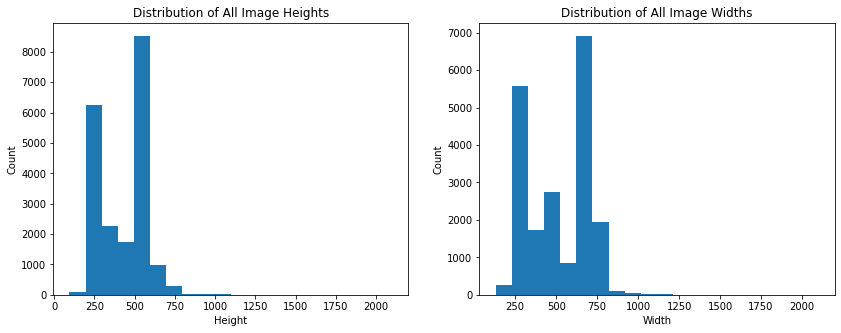

In [51]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(all_imgs_height, bins=20)
plt.title('Distribution of All Image Heights')
plt.xlabel('Height')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.hist(all_imgs_width, bins=20)
plt.title('Distribution of All Image Widths')
plt.xlabel('Width')
plt.ylabel('Count')
plt.show()

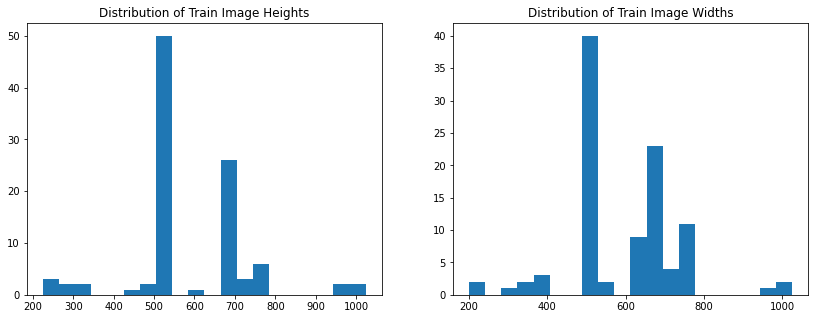

In [52]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(train_img_heights, bins=20)
plt.title('Distribution of Train Image Heights')
plt.subplot(1, 2, 2)
plt.hist(train_img_widths, bins=20)
plt.title('Distribution of Train Image Widths')
plt.show()

统计有多少张图片的长和宽都大于指定的数值

In [65]:
crop_width = 500
crop_height = 500
nAllImgs = len(ADE20K_Dataset)
img_idx_list = [i for i in range(nAllImgs) if all_imgs_width[i] > crop_width
                                        and all_imgs_height[i] > crop_height]
print('Number of images that can be cropped: ', len(img_idx_list))
print('Percentage of images that can be cropped: ', len(img_idx_list)/nAllImgs)

Number of images that can be cropped:  9313
Percentage of images that can be cropped:  0.4608114794656111


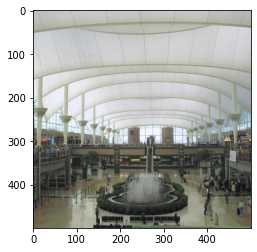

In [70]:
img_ToProcess = ADE20K_Dataset.get_img_as_PIL(img_idx_list[0])
crop_obj = torchvision.transforms.CenterCrop((crop_height, crop_width))
img_cropped = crop_obj(img_ToProcess)
plt.imshow(img_cropped) 